In [11]:
from kedro.io import DataCatalog
from kedro_datasets.pandas import ParquetDataset
import pandas as pd

catalog =  DataCatalog(
    {
        "assistance_train_dataset_1": ParquetDataset(filepath="../data/01_raw/assistance_train_dataset_1.parquet"),
        "assistance_train_dataset_2": ParquetDataset(filepath="../data/01_raw/assistance_train_dataset_2.parquet"),
        "assistance_train_dataset_3": ParquetDataset(filepath="../data/01_raw/assistance_train_dataset_3.parquet"),
    }
)

In [68]:
from kedro.framework.context import KedroContext
context = KedroContext()
print(context.params)

[12/15/24 22:56:47] INFO     Using                                                                  ]8;id=470021;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=799181;file:///projects/pytech-falck-competition/venv/lib/python3.12/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/projects/pytech-falck-competition/venv/lib/python3.12/site-packages/                
                             kedro/framework/project/rich_logging.yml' as logging configuration.                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 from kedro.framework.context import KedroContext                                             │
│ ❱ 2 context = KedroContext()                                                                     │
│   3 print(context.params)                                                                        │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: KedroContext.__init__() missing 5 required positional arguments: 'project_path', 'config_loader', 'env',
'package_name', and 'hook_manager'

In [12]:
assistance_train_dataset_1 = catalog.load("assistance_train_dataset_1")
assistance_train_dataset_2 = catalog.load("assistance_train_dataset_2")
assistance_train_dataset_3 = catalog.load("assistance_train_dataset_3")

In [13]:
assistance_train_dataset_1.head()

,EmitDate,EmitEndDate,AgentId,CallId,CallType,CallDirection,QueueName
0,2022-10-17 22:42:45.402895,2022-10-17 22:43:23.068921,5d5d6d09-8db0-4de8-8566-217e8c051f1f,sdv-pii-ou5qk,agent,outbound,1bad6b8cf97131fceab8543e81f7757195fbb1d36b376e...
1,2022-10-17 09:26:54.496597,2022-10-17 09:28:40.030373,4af305c9-28b2-4e57-bb39-c1d65237b1f9,sdv-pii-w7g3n,agent,inbound,bd51723189625f90588e977b9fb05fdf12b1b81d668f64...
2,2022-10-17 16:39:17.991224,2022-10-17 16:40:01.372890,08ee38dc-7073-4d19-bcc2-81521a959d86,sdv-pii-k50zl,agent,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...
3,2022-10-17 05:52:42.032933,2022-10-17 05:52:50.419619,316e461d-7dad-4b9d-a045-50e6a9986b0e,sdv-pii-k9z02,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...
4,2022-10-17 03:03:40.880062,2022-10-17 03:04:22.863554,f23913a4-badc-4360-98e6-20dc6620b9e8,sdv-pii-qvh6y,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...


In [14]:
assistance_train_dataset_2.head()

,EmitDate,EmitEndDate,AgentId,CallId,CallType,CallDirection,QueueName
0,2022-12-28 14:15:26.431026,2022-12-28 14:17:39.494603,5d5d6d09-8db0-4de8-8566-217e8c051f1f,sdv-pii-fuuqs,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...
1,2022-12-28 09:59:39.464488,2022-12-28 10:00:52.750547,60fb1f33-609f-49a6-b53a-3fc95a119e10,sdv-pii-seo6u,agent,inbound,1bad6b8cf97131fceab8543e81f7757195fbb1d36b376e...
2,2022-12-28 09:50:01.664353,2022-12-28 09:50:09.535134,837e6b57-1de9-4f48-ae24-649a79c87033,sdv-pii-eco6s,agent,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...
3,2022-12-28 00:23:22.057765,2022-12-28 00:26:36.682361,5be51088-ef6a-4afa-bbd6-3dda28d0ddf6,sdv-pii-8m3aj,agent,inbound,c17033805438f07b2509ffbf5e8f35e24f8aafff5bee2c...
4,2022-12-28 18:41:13.998318,2022-12-28 18:42:26.189956,415aea5e-d6e2-43ee-bf49-09e787a19212,sdv-pii-xn3y3,user,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...


In [15]:
df = pd.concat(
    [
        assistance_train_dataset_1,
        assistance_train_dataset_2,
        assistance_train_dataset_3
    ],
    ignore_index=True
)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255345 entries, 0 to 2255344
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   EmitDate       datetime64[ns]
 1   EmitEndDate    datetime64[ns]
 2   AgentId        object        
 3   CallId         object        
 4   CallType       object        
 5   CallDirection  object        
 6   QueueName      object        
dtypes: datetime64[ns](2), object(5)
memory usage: 120.4+ MB


In [17]:
df.isna().sum()

EmitDate             0
EmitEndDate          0
AgentId          64234
CallId               0
CallType             0
CallDirection        0
QueueName            0
dtype: int64

In [18]:
df["Date"] = df["EmitDate"].dt.date
df["CallTime"] = (df["EmitEndDate"] - df["EmitDate"]).dt.total_seconds()
df.head()

,EmitDate,EmitEndDate,AgentId,CallId,CallType,CallDirection,QueueName,Date,CallTime
0,2022-10-17 22:42:45.402895,2022-10-17 22:43:23.068921,5d5d6d09-8db0-4de8-8566-217e8c051f1f,sdv-pii-ou5qk,agent,outbound,1bad6b8cf97131fceab8543e81f7757195fbb1d36b376e...,2022-10-17,37.666026
1,2022-10-17 09:26:54.496597,2022-10-17 09:28:40.030373,4af305c9-28b2-4e57-bb39-c1d65237b1f9,sdv-pii-w7g3n,agent,inbound,bd51723189625f90588e977b9fb05fdf12b1b81d668f64...,2022-10-17,105.533776
2,2022-10-17 16:39:17.991224,2022-10-17 16:40:01.372890,08ee38dc-7073-4d19-bcc2-81521a959d86,sdv-pii-k50zl,agent,inbound,880c14638d515f61e00c6ddef2234db8beb8287722cb7e...,2022-10-17,43.381666
3,2022-10-17 05:52:42.032933,2022-10-17 05:52:50.419619,316e461d-7dad-4b9d-a045-50e6a9986b0e,sdv-pii-k9z02,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...,2022-10-17,8.386686
4,2022-10-17 03:03:40.880062,2022-10-17 03:04:22.863554,f23913a4-badc-4360-98e6-20dc6620b9e8,sdv-pii-qvh6y,agent,inbound,f1bc70f26a24de569b9c9b32c38e45f2144e4326a047aa...,2022-10-17,41.983492


In [19]:
df_agg_calls = df.groupby("Date")["EmitDate"].count().reset_index().rename(columns={"EmitDate": "Calls"})
df_agg_call_time = df.groupby("Date")["CallTime"].sum().reset_index()
df_agg_call_type = pd.crosstab(df["Date"], df["CallType"]).reset_index()
df_agg_call_direction = pd.crosstab(df["Date"], df["CallDirection"]).reset_index()

df_agg_numerical = df_agg_calls.merge(df_agg_call_time, on="Date")
df_agg_categories = df_agg_call_type.merge(df_agg_call_direction, on="Date")
df_agg = df_agg_numerical.merge(df_agg_categories, on="Date")

In [20]:
df_agg.columns = [col.capitalize() for col in df_agg.columns]
df_agg.head()

,Date,Calls,Calltime,Agent,External,User,Voicemail,Inbound,Outbound
0,2022-03-06,1635,92003.041834,1434,45,150,6,1316,319
1,2022-03-07,4242,244089.809001,3736,113,387,6,3447,795
2,2022-03-08,4413,249329.408826,3856,120,426,11,3592,821
3,2022-03-09,4487,261058.142927,3940,132,407,8,3640,847
4,2022-03-10,3826,221972.967435,3344,116,362,4,3103,723


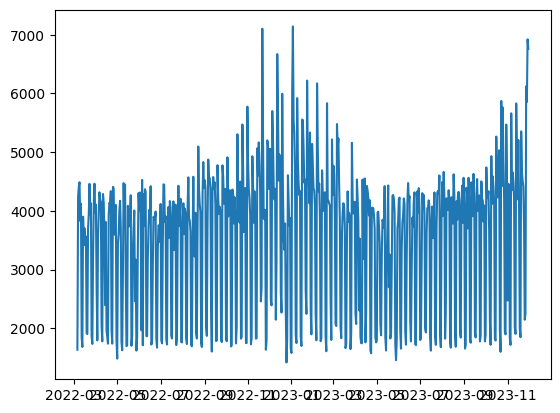

In [21]:
import matplotlib.pyplot as plt

plt.plot(df_agg["Date"], df_agg["Calls"]);

array([[<Axes: title={'center': 'Calls'}>,
        <Axes: title={'center': 'Calltime'}>,
        <Axes: title={'center': 'Agent'}>],
       [<Axes: title={'center': 'External'}>,
        <Axes: title={'center': 'User'}>,
        <Axes: title={'center': 'Voicemail'}>],
       [<Axes: title={'center': 'Inbound'}>,
        <Axes: title={'center': 'Outbound'}>, <Axes: >]], dtype=object)

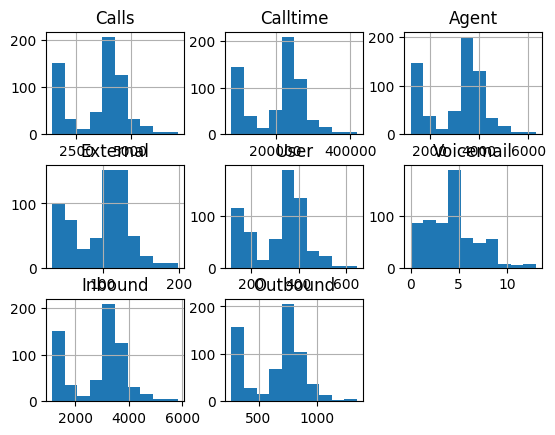

In [23]:
df_agg.hist()

In [24]:
df_agg.isnull().sum()

Date         0
Calls        0
Calltime     0
Agent        0
External     0
User         0
Voicemail    0
Inbound      0
Outbound     0
dtype: int64

In [25]:
df_agg.describe()

,Calls,Calltime,Agent,External,User,Voicemail,Inbound,Outbound
count,635.000000,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000
mean,3551.724409,206473.561528,3133.565354,98.300787,315.59685,4.261417,2894.707087,657.017323
std,1221.641302,70916.985350,1078.061132,35.487181,109.42343,2.567267,994.650538,228.335207
min,1418.000000,81906.130000,1225.000000,34.000000,117.00000,0.000000,1149.000000,269.000000
25%,2041.500000,118758.813216,1805.000000,61.000000,185.00000,2.000000,1669.000000,382.500000
50%,3956.000000,230070.083405,3478.000000,107.000000,347.00000,4.000000,3219.000000,730.000000
75%,4335.500000,251948.443189,3826.000000,122.000000,387.00000,6.000000,3538.500000,805.000000
max,7140.000000,417235.129375,6304.000000,198.000000,643.00000,13.000000,5823.000000,1339.000000


/projects/pytech-falck-competition/venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/pytech-falck-competition/venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/pytech-falck-competition/venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/projects/pytech-falck-competition/venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

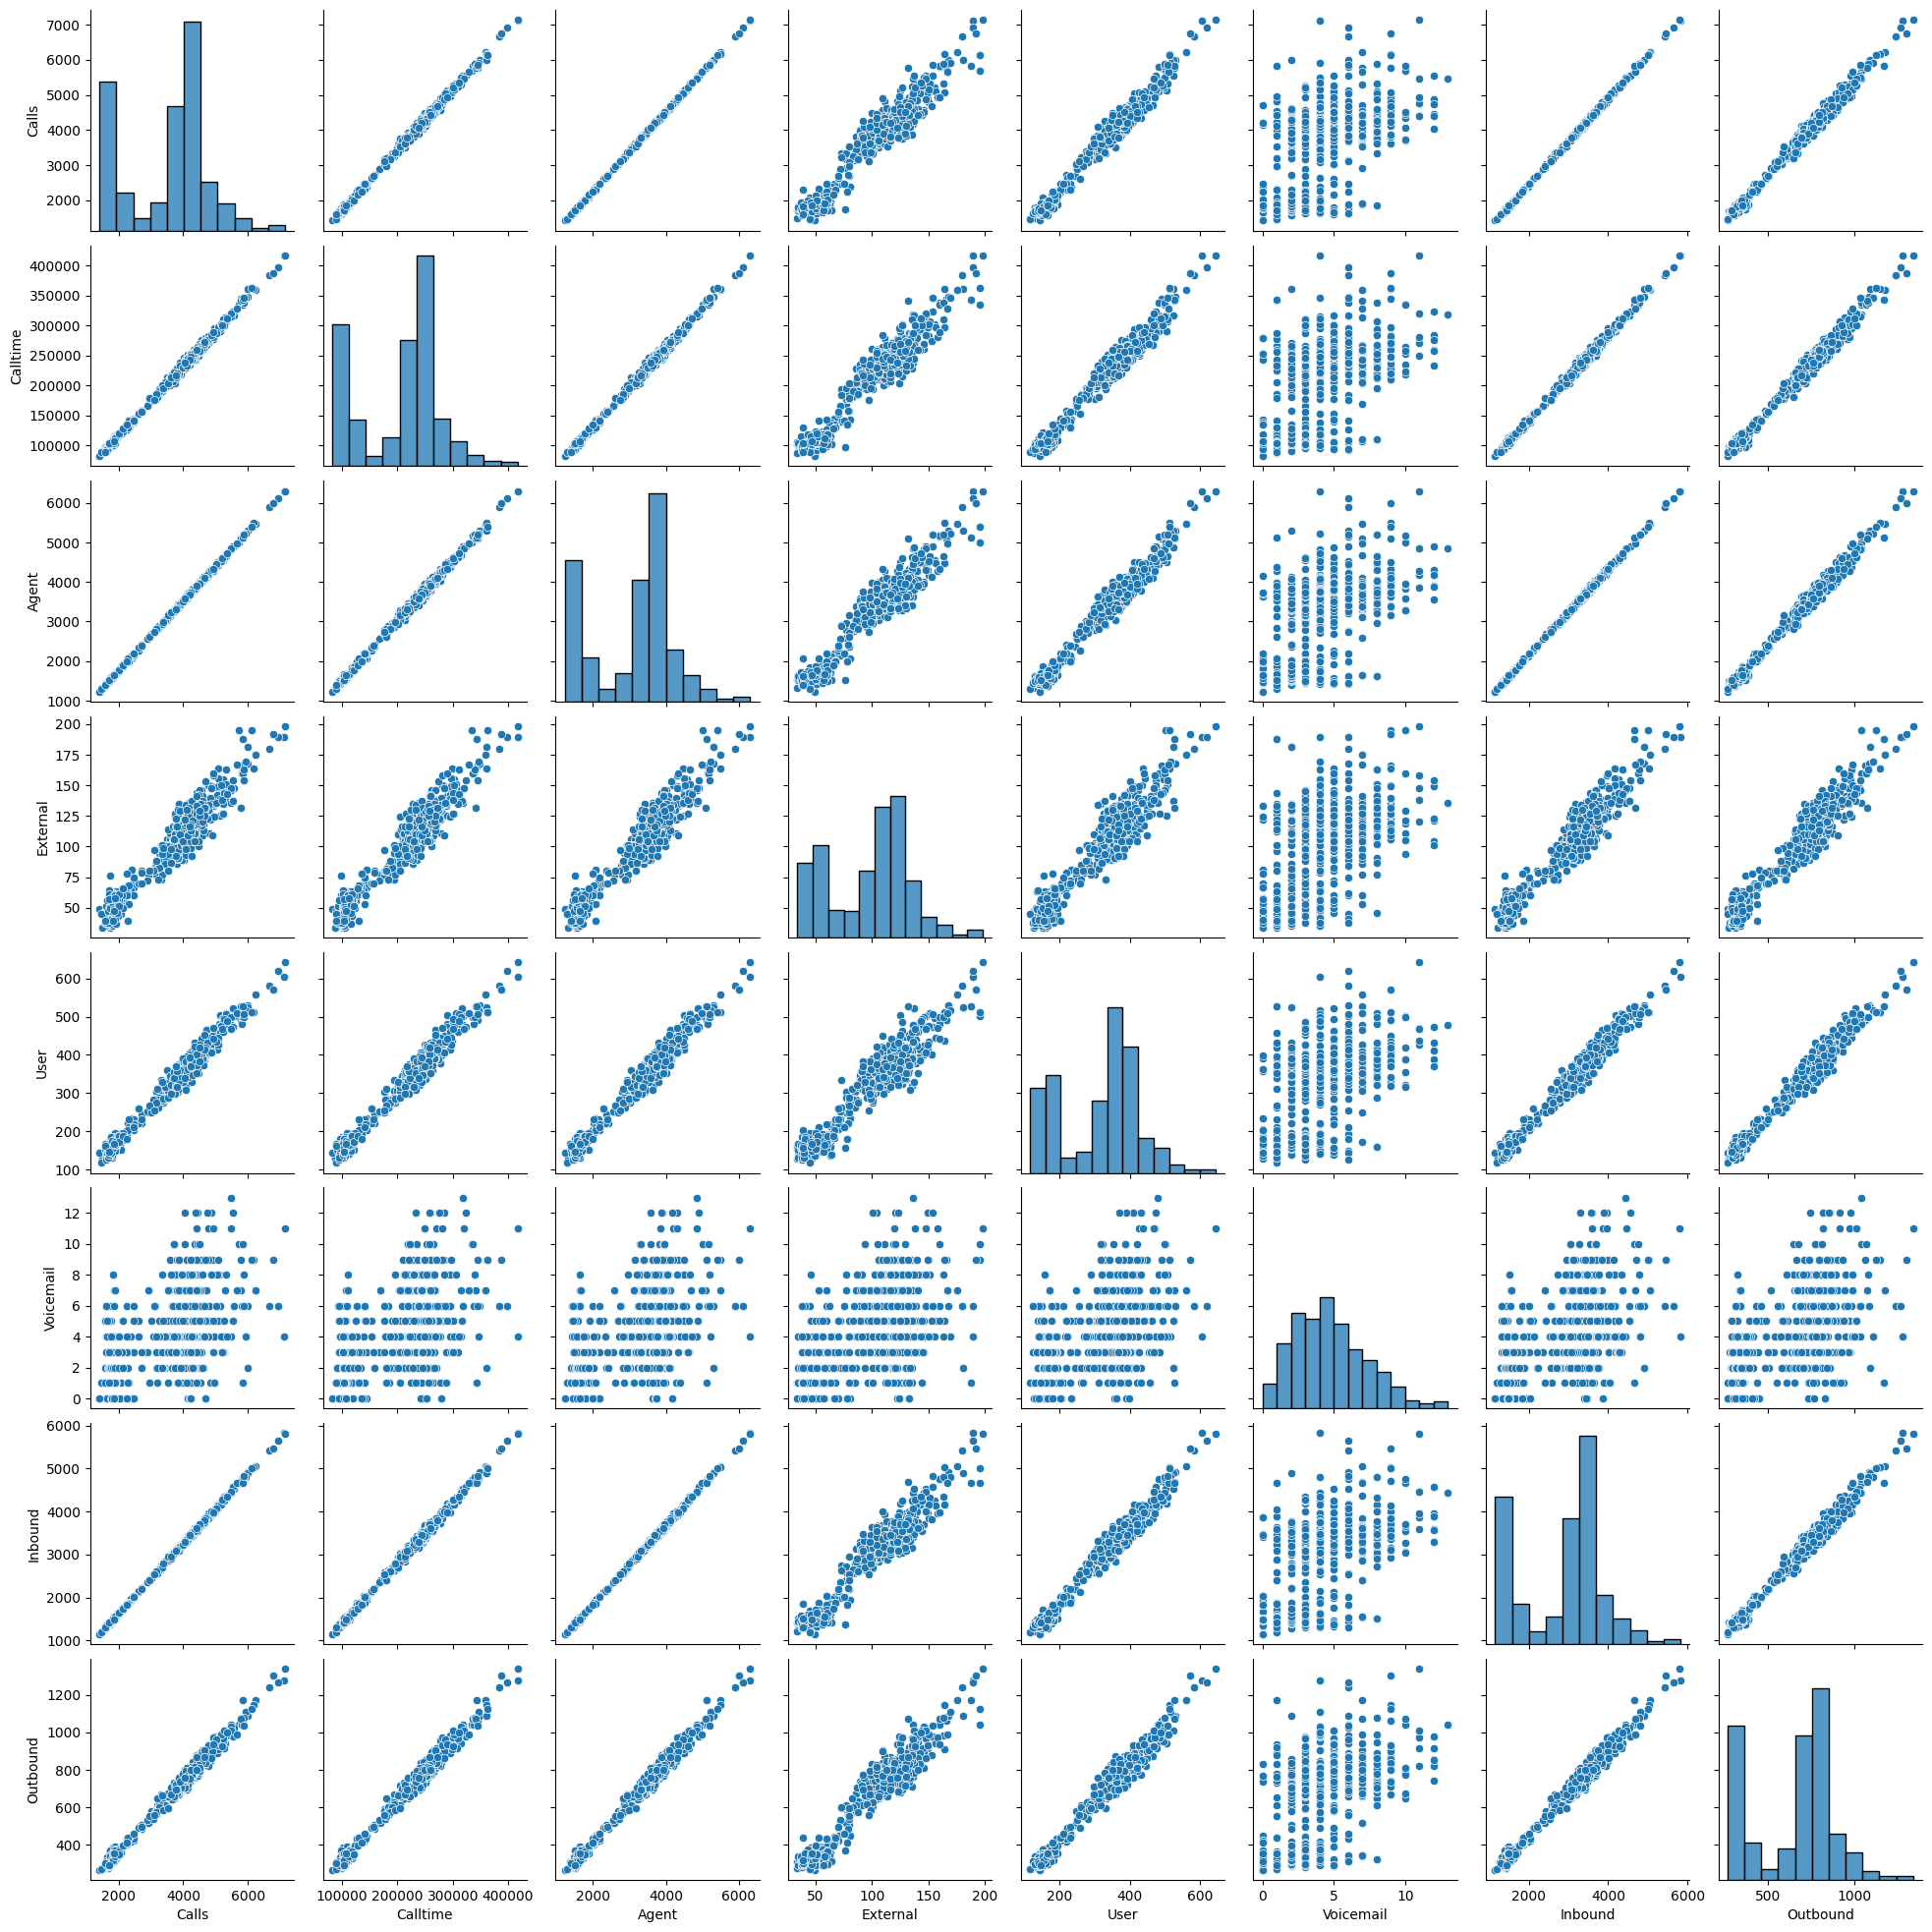

In [26]:
import seaborn as sns

sns.pairplot(df_agg)

In [28]:
df_agg.head(1)


,Date,Calls,Calltime,Agent,External,User,Voicemail,Inbound,Outbound
0,2022-03-06,1635,92003.041834,1434,45,150,6,1316,319


Historical weather data

In [33]:
import requests

API_KEY = "KL2VH3C85BZDHRE8M2AJRH3P7"

LOCATION_1 = "Copenhagen, Denmark"
LOCATION_2 = "Aarhus, Denmark"

START_DATE = "2022-03-06"
END_DATE = "2023-11-30"

url_historical = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{LOCATION_1}/{START_DATE}/{END_DATE}"
params_historical = {
    "unitGroup": "metric", 
    "key": API_KEY,
    "contentType": "json",
    "include": "days"
}

response_historical = requests.get(url_historical, params=params_historical)
data_historical = response_historical.json()

historical_days = data_historical["days"]
df_historical = pd.DataFrame(historical_days)
df_historical["Date"] = pd.to_datetime(historical_df["datetime"])

In [42]:
df_historical.tail(1)

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
634,2023-11-30,1701298800,0.4,-3.1,-1.1,-3.9,-8.5,-5.9,-2.8,88.0,...,1701328348,15:43:46,1701355426,0.6,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"[06180099999, 06174099999, E7634, 06170099999,...",obs,NaN


In [35]:
df_historical.columns

Index(['datetime', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'source', 'tzoffset'],
      dtype='object')

In [54]:
df_conditions_one_hot_encoding = pd.get_dummies(df_historical['conditions'], drop_first=True) * 1

In [56]:
weather_cols = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'precip', 'windspeed', 'pressure']
df_weather_copenhagen = pd.concat([df_historical[weather_cols], df_conditions_one_hot_encoding], axis=1)

In [63]:
new_cop_cols = ["Copenhagen_" + col for col in df_weather_copenhagen.columns]
df_weather_copenhagen.columns = [col.replace(" ", "_").replace(",","") for col in new_cop_cols]

Future weather data

Holidays in Denmark

In [64]:
!pip install holidays

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.0 MB/s eta 0:00:00m eta 0:00:010:01:01


In [65]:
from datetime import datetime
import holidays

start_date = datetime(2022, 3, 6)
end_date = datetime(2023, 12, 31)

date_range = pd.date_range(start=start_date, end=end_date)
denmark_holidays = holidays.Denmark(years=[2022, 2023])

data = {
    "Date": date_range,
    "Is_holiday": [1 if date in denmark_holidays else 0 for date in date_range]
}

df_holidays = pd.DataFrame(data)
df_holidays.head()

,Date,Is_holiday
0,2022-03-06,0
1,2022-03-07,0
2,2022-03-08,0
3,2022-03-09,0
4,2022-03-10,0


In [69]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        666 non-null    datetime64[ns]
 1   Is_holiday  666 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.5 KB


In [67]:
df_holidays[df_holidays["Is_holiday"] == 1]

,Date,Is_holiday
39,2022-04-14,1
40,2022-04-15,1
42,2022-04-17,1
43,2022-04-18,1
68,2022-05-13,1
81,2022-05-26,1
91,2022-06-05,1
92,2022-06-06,1
294,2022-12-25,1
295,2022-12-26,1


In [84]:
import numpy as np

df_agg["Date"] = pd.to_datetime(df_agg["Date"])
dates = df_agg["Date"]
df_agg["Year"] = dates.dt.year
df_agg["Month"] = dates.dt.month
df_agg["Day"] = dates.dt.day
df_agg["Day_of_week"] = dates.dt.weekday
df_agg["Week_of_year"] = dates.dt.isocalendar().week
df_agg["Day_of_year"] = dates.dt.dayofyear
df_agg["Is_weekend"] = dates.isin([5, 6]).astype(int)
df_agg["Day_of_week_sin"] = np.sin(2 * np.pi * df_agg["Day_of_week"] / 7)
df_agg["Day_of_week_cos"] = np.cos(2 * np.pi * df_agg["Day_of_week"] / 7)
df_agg["Month_sin"] = np.sin(2 * np.pi * df_agg["Month"] / 12)
df_agg["Month_cos"] = np.cos(2 * np.pi * df_agg["Month"] / 12)

day_of_year = dates.dt.dayofyear
days_in_year = dates.dt.is_leap_year.apply(lambda x: 366 if x else 365)

df_agg["Year_sin"] = np.sin(2 * np.pi * day_of_year / days_in_year)
df_agg["Year_cos"] = np.cos(2 * np.pi * day_of_year / days_in_year)

In [90]:
from requests import get

def _get_weather_data(location, start_date, end_date) -> pd.DataFrame:
    url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{start_date}/{end_date}"
    params = {
        "unitGroup": "metric", 
        "key": "KL2VH3C85BZDHRE8M2AJRH3P7",
        "contentType": "json",
        "include": "days"
    }

    response = get(url, params=params)
    data_historical = response.json()

    historical_days = data_historical["days"]
    df_weather = pd.DataFrame(historical_days)
    df_weather["Date"] = pd.to_datetime(df_weather["datetime"])
    df_conditions_one_hot_encoding = pd.get_dummies(df_weather['conditions'], drop_first=True) * 1
    weather_cols = ['tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'precip', 'windspeed', 'pressure']
    
    df_weather = pd.concat([df_weather[weather_cols], df_conditions_one_hot_encoding], axis=1)
    new_cop_cols = [location + "_" + col for col in df_weather.columns]
    df_weather.columns = [col.replace(" ", "_").replace(",","") for col in new_cop_cols]
    return df_weather

In [91]:
df_copenhagen = _get_weather_data("Copenhagen, Denmark", "2022-03-06", "2023-12-31")

In [97]:
df_copenhagen = pd.concat([df_holidays["Date"], df_copenhagen], axis=1)

In [169]:
df_pre = df_copenhagen.merge(df_holidays, on="Date", how="outer")
df = df_pre.merge(df_agg, on="Date", how="outer")

In [170]:
df.tail()

,Date,Copenhagen_Denmark_tempmax,Copenhagen_Denmark_tempmin,Copenhagen_Denmark_temp,Copenhagen_Denmark_dew,Copenhagen_Denmark_humidity,Copenhagen_Denmark_precip,Copenhagen_Denmark_windspeed,Copenhagen_Denmark_pressure,Copenhagen_Denmark_Overcast,...,Day_of_week,Week_of_year,Day_of_year,Is_weekend,Day_of_week_sin,Day_of_week_cos,Month_sin,Month_cos,Year_sin,Year_cos
661,2023-12-27,4.4,0.5,2.8,0.2,82.8,0.102,31.5,1015.1,0,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,2023-12-28,8.4,3.5,6.8,5.2,89.8,9.674,33.4,1001.8,0,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,2023-12-29,8.1,6.1,7.1,4.6,83.8,2.336,43.0,996.2,0,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
664,2023-12-30,5.9,3.8,5.0,2.8,85.8,5.473,19.9,1003.3,0,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,2023-12-31,5.4,2.5,4.6,3.8,94.4,5.769,33.0,1005.9,0,...,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
train_data = df[(df["Date"] < "2023-11-01") & (df["Date"] >= "2022-03-06")]
test_data = df[(df["Date"] >= "2023-11-01") & (df["Date"] < "2023-12-01")]

In [225]:
test_data[features].tail()

,Year,Month,Day,Day_of_week,Week_of_year,Day_of_year,Is_weekend,Day_of_week_sin,Day_of_week_cos,Month_sin,...,Copenhagen_Denmark_Partially_cloudy,Copenhagen_Denmark_Rain,Copenhagen_Denmark_Rain_Overcast,Copenhagen_Denmark_Rain_Partially_cloudy,Copenhagen_Denmark_Snow,Copenhagen_Denmark_Snow_Overcast,Copenhagen_Denmark_Snow_Partially_cloudy,Copenhagen_Denmark_Snow_Rain,Copenhagen_Denmark_Snow_Rain_Overcast,Copenhagen_Denmark_Snow_Rain_Partially_cloudy
630,2023.0,11.0,26.0,6.0,47,330.0,0.0,-0.781831,0.623490,-0.5,...,0,0,0,0,0,0,0,0,0,1
631,2023.0,11.0,27.0,0.0,48,331.0,0.0,0.000000,1.000000,-0.5,...,0,0,0,0,0,0,1,0,0,0
632,2023.0,11.0,28.0,1.0,48,332.0,0.0,0.781831,0.623490,-0.5,...,0,0,0,0,0,0,1,0,0,0
633,2023.0,11.0,29.0,2.0,48,333.0,0.0,0.974928,-0.222521,-0.5,...,0,0,0,0,0,0,0,0,0,1
634,2023.0,11.0,30.0,3.0,48,334.0,0.0,0.433884,-0.900969,-0.5,...,0,0,0,0,0,0,0,0,0,1


In [226]:
features = ['Year', 'Month', 'Day', 'Day_of_week',
       'Week_of_year', 'Day_of_year', 'Is_weekend', 'Day_of_week_sin',
       'Day_of_week_cos', 'Month_sin', 'Month_cos', 'Year_sin', 'Year_cos',
       'Is_holiday', 'Copenhagen_Denmark_tempmax',
       'Copenhagen_Denmark_tempmin', 'Copenhagen_Denmark_temp',
       'Copenhagen_Denmark_dew', 'Copenhagen_Denmark_humidity',
       'Copenhagen_Denmark_precip', 'Copenhagen_Denmark_windspeed',
       'Copenhagen_Denmark_pressure', 'Copenhagen_Denmark_Overcast',
       'Copenhagen_Denmark_Partially_cloudy', 'Copenhagen_Denmark_Rain',
       'Copenhagen_Denmark_Rain_Overcast',
       'Copenhagen_Denmark_Rain_Partially_cloudy', 'Copenhagen_Denmark_Snow',
       'Copenhagen_Denmark_Snow_Overcast',
       'Copenhagen_Denmark_Snow_Partially_cloudy',
       'Copenhagen_Denmark_Snow_Rain', 'Copenhagen_Denmark_Snow_Rain_Overcast',
       'Copenhagen_Denmark_Snow_Rain_Partially_cloudy']

In [227]:
y_train = train_data["Calls"]
X_train = train_data[features]

In [228]:
from xgboost import XGBRegressor

regressor = XGBRegressor(
        n_estimators=1000,
        max_depth=6,
        learning_rate=0.1,
        objective='reg:squarederror',
        andom_state=123
    )
regressor.fit(X_train, y_train)

[12/16/24 00:17:00] WARNING  /projects/pytech-falck-competition/venv/lib/python3.12/site-packages/x ]8;id=523229;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=769394;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             gboost/core.py:158: UserWarning: [00:17:00] WARNING:                                  
                             /workspace/src/learner.cc:740:                                                        
                             Parameters: { "andom_state" } are not used.                                           
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

XGBRegressor(andom_state=123, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, ...)

In [229]:
regressor.feature_importances_


array([0.00061463, 0.00066229, 0.00150795, 0.3990883 , 0.00759126,
       0.01196982, 0.        , 0.00166725, 0.00068581, 0.0014075 ,
       0.02227282, 0.00782147, 0.04422026, 0.43378967, 0.00482886,
       0.00252615, 0.00522174, 0.00564877, 0.00227482, 0.00186965,
       0.0017189 , 0.00244204, 0.00313728, 0.01347718, 0.00049396,
       0.00445991, 0.00162244, 0.        , 0.        , 0.        ,
       0.01038621, 0.00222094, 0.00437197], dtype=float32)

In [230]:
X_test = test_data[features]
y_pred = regressor.predict(X_test)

In [239]:
from sklearn.metrics import (
    max_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    root_mean_squared_error,
)

def _compute_asses_metrics(y_test: pd.Series, y_pred: pd.Series) -> dict:
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = root_mean_squared_error(y_test, y_pred)
    me = max_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return {"r2_score": score, "mae": mae, "mse": mse, "max_error": me, "mape": mape}

In [240]:
len(test_data["Calls"])

30

In [241]:
_compute_asses_metrics(test_data["Calls"], y_pred)


{
    'r2_score': 0.7611083383170105,
    'mae': np.float64(496.84706624348956),
    'mse': np.float64(756.722200003666),
    'max_error': np.float64(2176.130859375),
    'mape': np.float64(0.12115156275619636)
}

In [246]:
pd.concat([test_data["Calls"], y_pred], axis=1)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 pd.concat([test_data["Calls"], y_pred], axis=1)                                              │
│   2                                                                                              │
│                                                                                                  │
│ /projects/pytech-falck-competition/venv/lib/python3.12/site-packages/pandas/core/reshape/concat. │
│ py:382 in concat                                                                                 │
│                                                                                                  │
│   379 │   elif copy and using_copy_on_write():                                                   │
│   380 │   │   copy = False                                                                       │
│   381 │                                                                                          │
│ ❱ 382 │   op = _Concatenator(                                                                    │
│   383 │   │   objs,                                                                              │
│   384 │   │   axis=axis,                                                                         │
│   385 │   │   ignore_index=ignore_index,                                                         │
│                                                                                                  │
│ /projects/pytech-falck-competition/venv/lib/python3.12/site-packages/pandas/core/reshape/concat. │
│ py:448 in __init__                                                                               │
│                                                                                                  │
│   445 │   │   objs, keys = self._clean_keys_and_objs(objs, keys)                                 │
│   446 │   │                                                                                      │
│   447 │   │   # figure out what our result ndim is going to be                                   │
│ ❱ 448 │   │   ndims = self._get_ndims(objs)                                                      │
│   449 │   │   sample, objs = self._get_sample_object(objs, ndims, keys, names, levels)           │
│   450 │   │                                                                                      │
│   451 │   │   # Standardize axis parameter to int                                                │
│                                                                                                  │
│ /projects/pytech-falck-competition/venv/lib/python3.12/site-packages/pandas/core/reshape/concat. │
│ py:489 in _get_ndims                                                                             │
│                                                                                                  │
│   486 │   │   │   │   │   f"cannot concatenate object of type '{type(obj)}'; "                   │
│   487 │   │   │   │   │   "only Series and DataFrame objs are valid"                             │
│   488 │   │   │   │   )                                                                          │
│ ❱ 489 │   │   │   │   raise TypeError(msg)                                                       │
│   490 │   │   │                                                                                  │
│   491 │   │   │   ndims.add(obj.ndim)                                                            │
│   492 │   │   return ndims                                                                       │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: cannot concatenate object of type '<class 'numpy.n

In [242]:
train_data[["Calls"]].tail(100)

,Calls
505,3749.0
506,4316.0
507,4335.0
508,4295.0
509,4603.0
...,...
600,4247.0
601,1946.0
602,1897.0
603,5470.0


In [190]:
y_pred = int(y_pred)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 y_pred = int(y_pred)                                                                         │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: only length-1 arrays can be converted to Python scalars

In [195]:
y_pred


[
    2675,
    2563,
    2615,
    2382,
    2377,
    2464,
    2521,
    2409,
    2343,
    2384,
    2259,
    2541,
    2529,
    2585,
    1927,
    2059,
    2116,
    2127,
    2101,
    2227,
    2119,
    2241,
    2334,
    2079,
    1922,
    1997,
    2218,
    2187,
    2031,
    2124,
    2259
]

In [192]:
y_pred = list(map(int, y_pred))

In [196]:
import json


predictions_dict = {
        "predictions": y_pred
    }

with open("predictions.json", "w+") as json_file:
    json.dump(predictions_dict, json_file, indent=4)